<font size = "5"> **Chapter 2: [Diffraction](Ch2-Diffraction.ipynb)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />


# Relrod - Sample Geometry and Excitation Error

part of 


<font size = "5"> **[Analysis of Transmission Electron Microscope Data](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)**</font>


by Gerd Duscher, 2020

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes

We first **load the usual libraries**:

In [2]:
%pylab --no-import-all notebook 

from mpl_toolkits.mplot3d import Axes3D  # 3D plotting

__notebook_version__ = '2021.02.09'
print('notebook version: ', __notebook_version__)

Populating the interactive namespace from numpy and matplotlib
notebook version:  2021.02.09


## Goals
Here we want to invesitate the influence of sample shape onto the diffraction pattern.

Generally, we have to consider the sample to be a thin disk-like shape, which in reciprocal space that is a rod-like shape.

It is this rod, together with dynamic scattering, that makes diffraction spots with excitation error possible.

In the following, we perform Fourier Transforms on disks with different ratios of height to radius.

## Make a disk shaped sample

Please, change ``width`` and ``height`` to see the effect in the Fourier Transform

In [10]:
radius = 50

height= 8

data = np.zeros([100,100,100])

x, y = np.mgrid[-data.shape[0]/2:data.shape[0]/2,-data.shape[1]/2:data.shape[1]/2]

data[x**2+y**2<radius**2, int(data.shape[2]/2-height/2): int(data.shape[2]/2+1+height/2)  ] = 1
X, Y, Z = np.where(data>0)

<IPython.core.display.Javascript object>


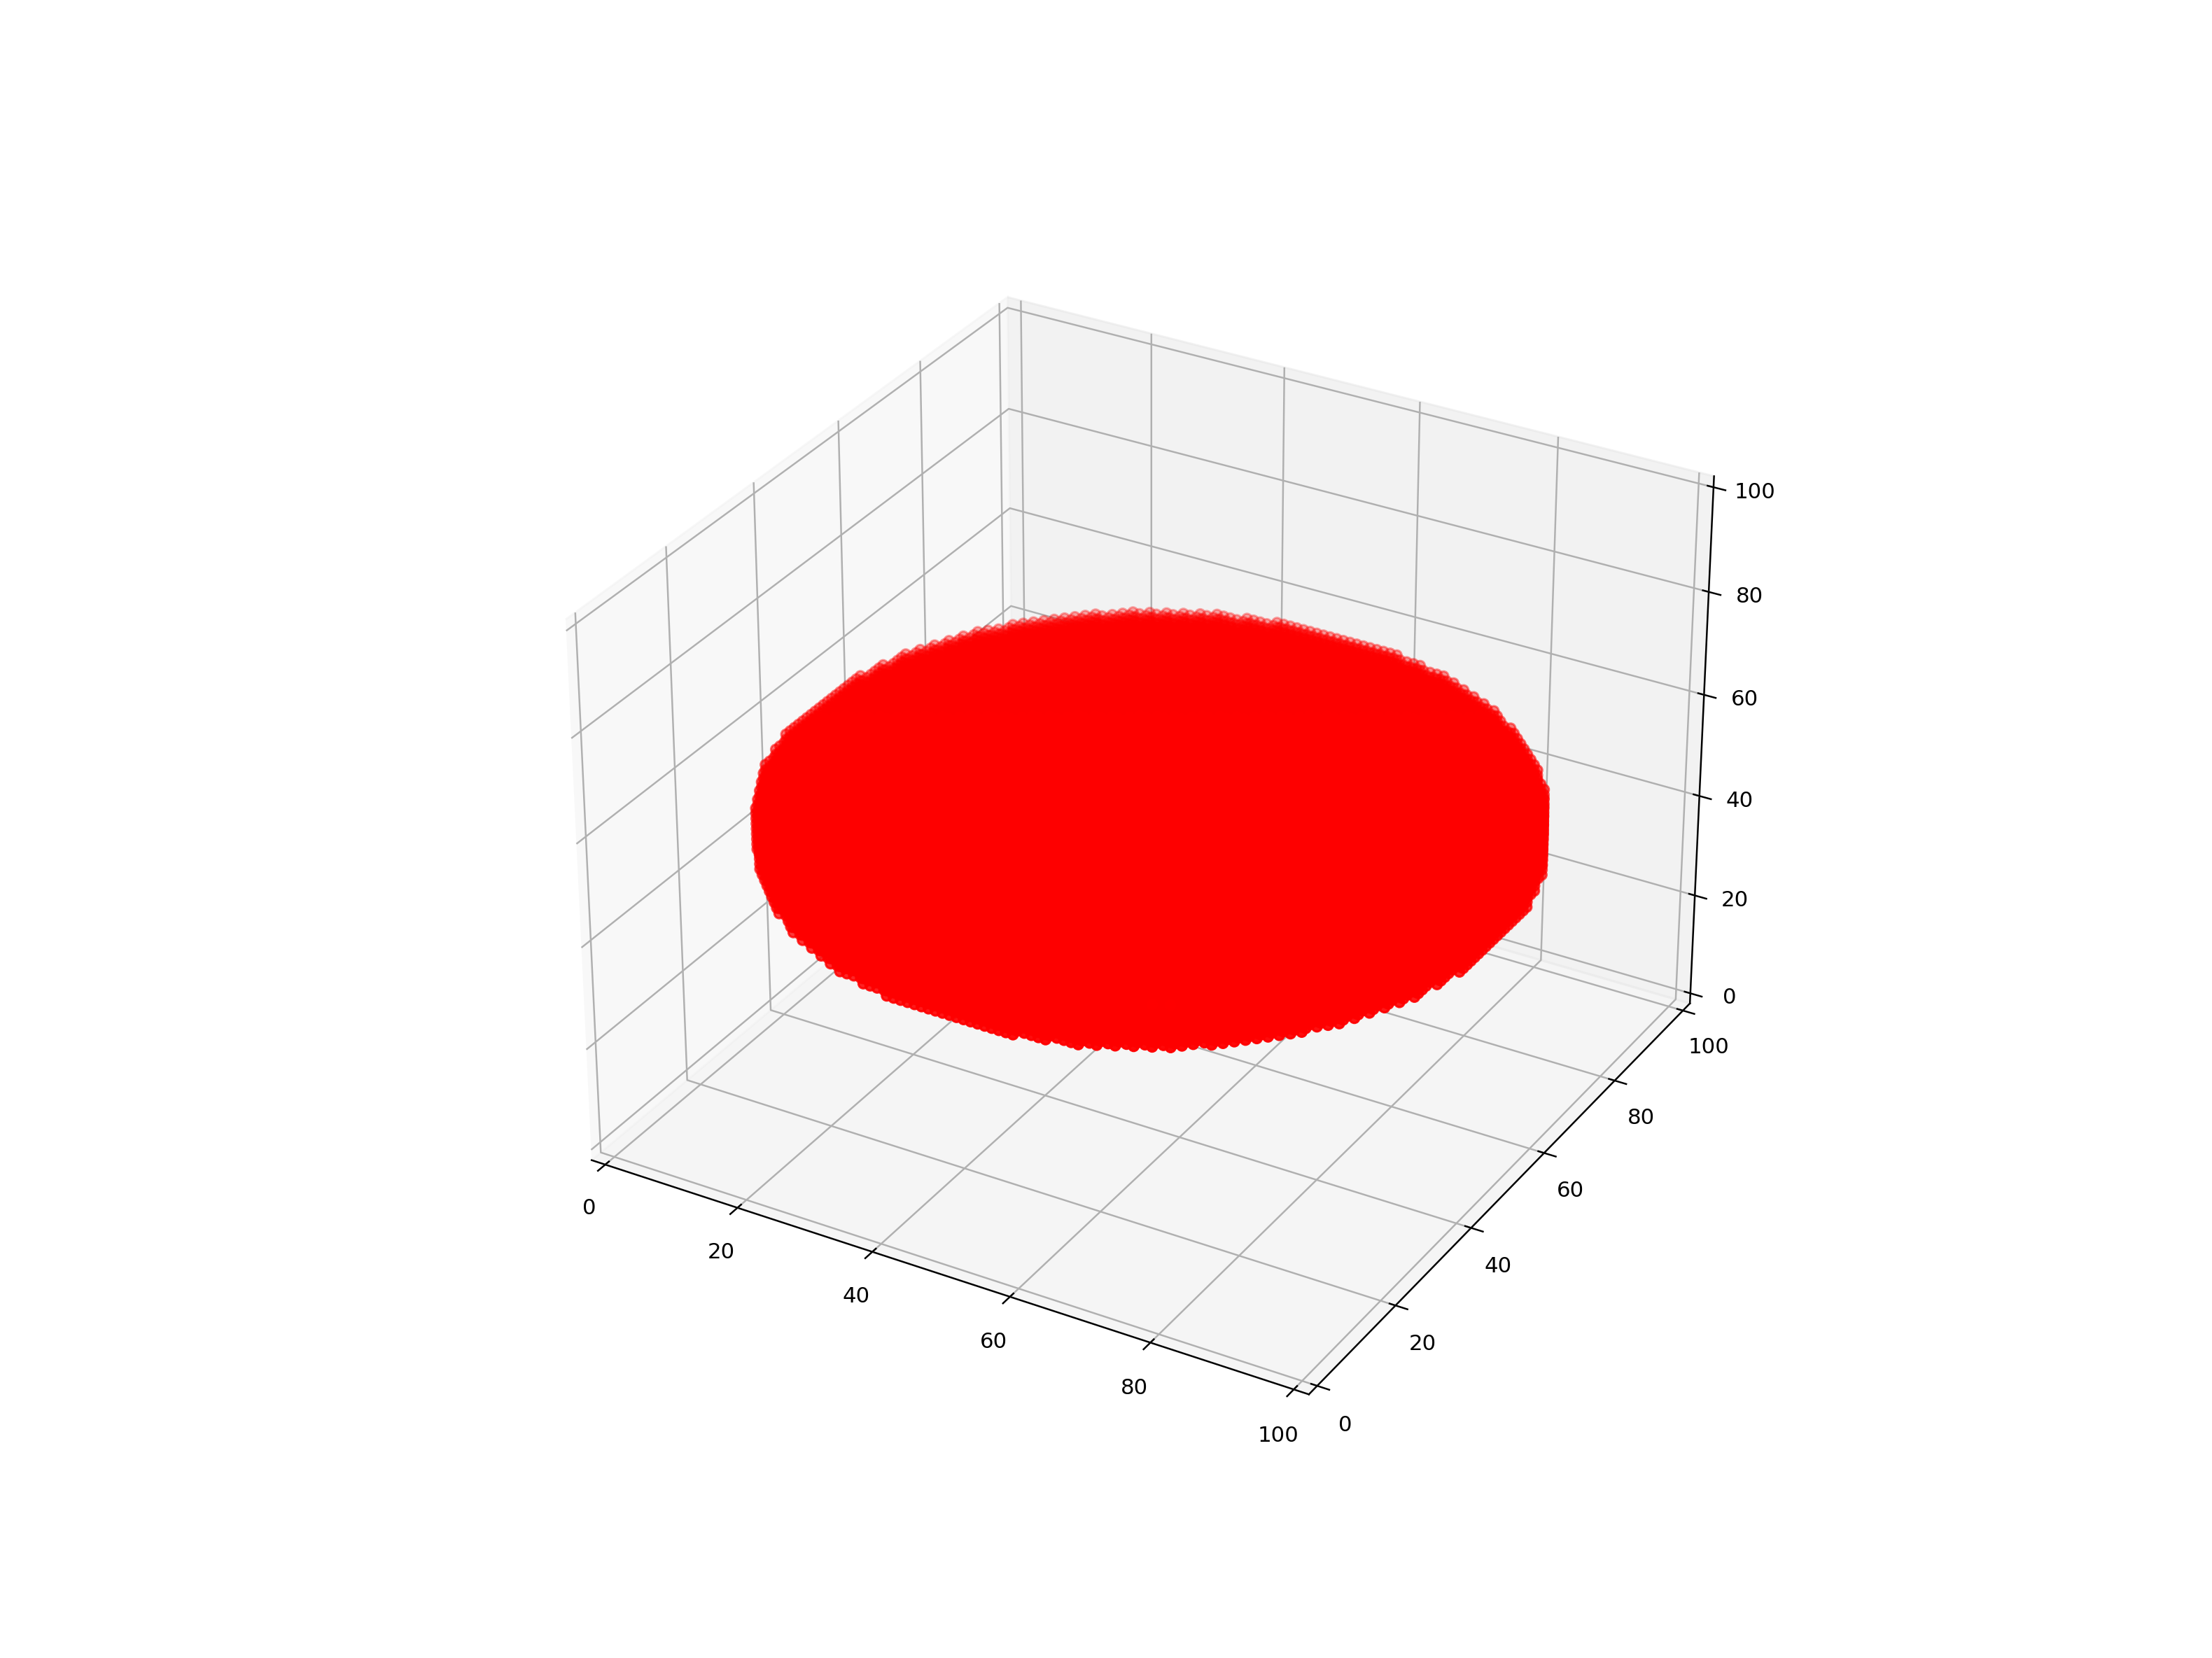

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.scatter(X, Y, Z, color='r', label='real space')
#ax.scatter(Xf, Yf, Zf, color='b', label='reciprocal space')

ax.set_xlim(0,data.shape[0])
ax.set_ylim(0,data.shape[1])
ax.set_zlim(0,data.shape[2]);

## Perform Fourier transform

In [13]:
r_data = np.fft.fftshift(np.fft.fftn(np.fft.fftshift(data)))

r_data = np.log(1+np.abs(r_data))
r_data[r_data<r_data.max()*.8] = 0
r_data[r_data>0]=1

Xf, Yf, Zf = np.where(r_data>0)

## Plot Data Fast

<IPython.core.display.Javascript object>


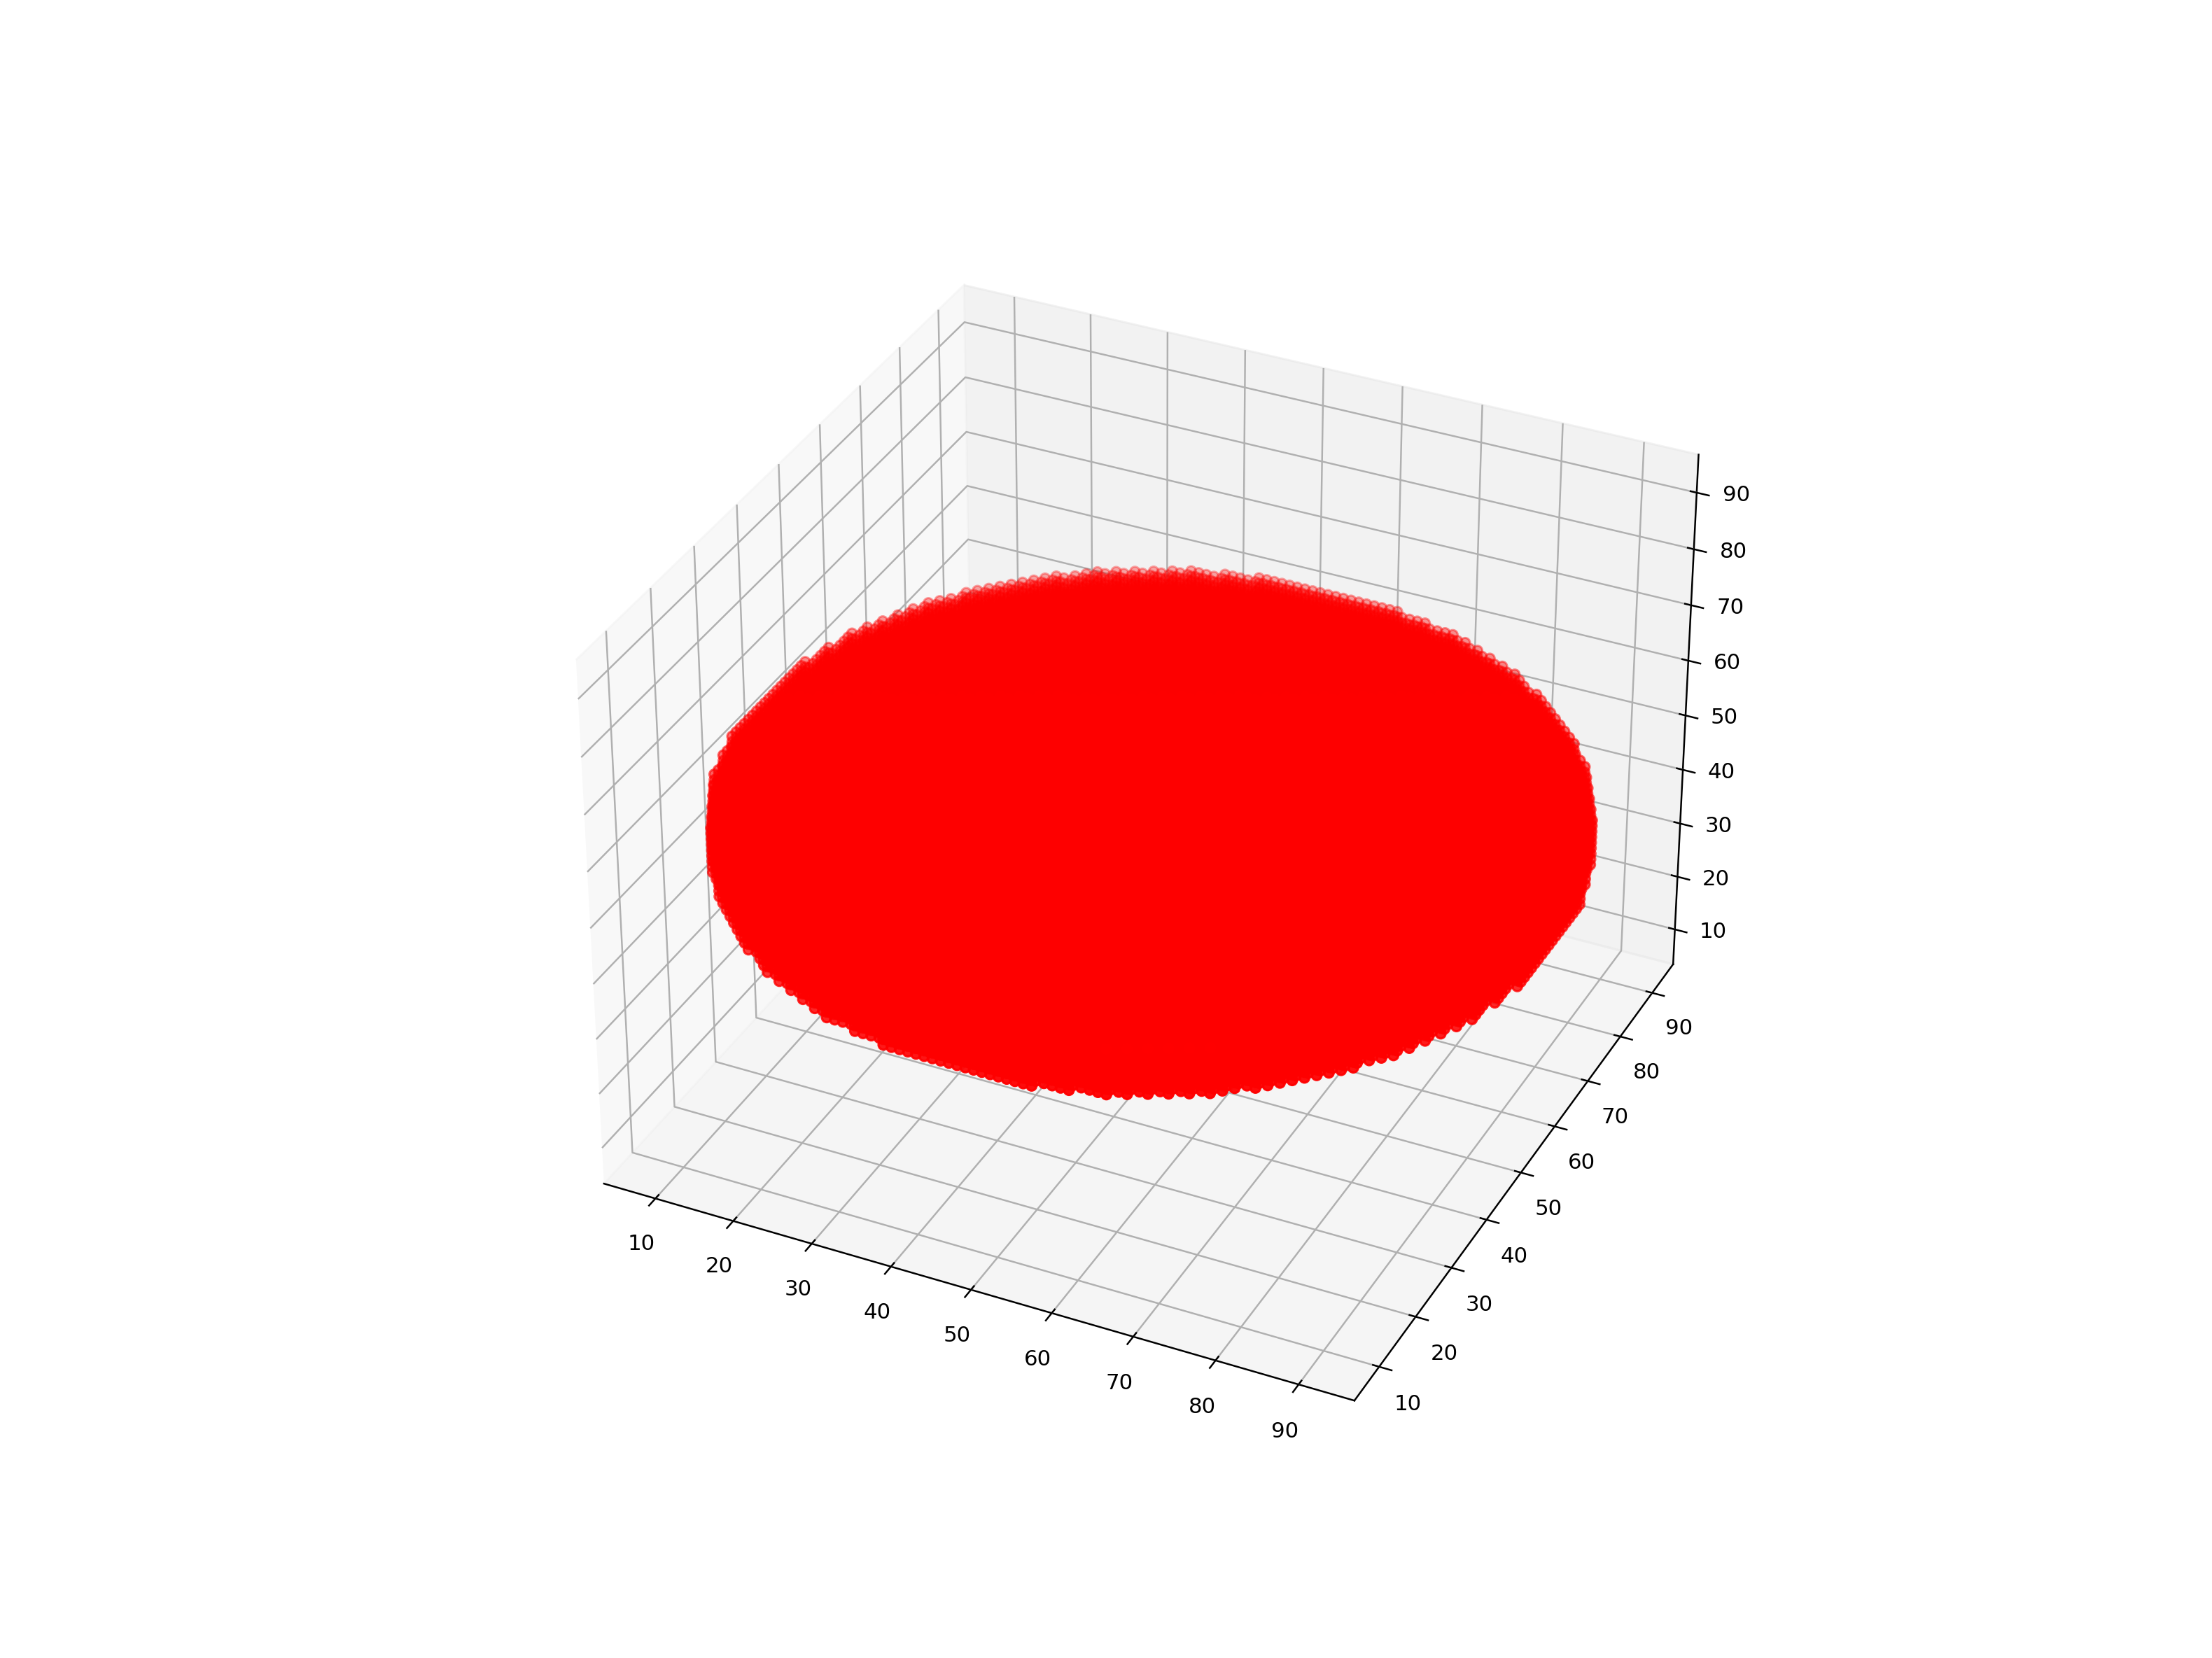

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.scatter(X, Y, Z, color='r', label='real space')
ax.scatter(Xf, Yf, Zf, color='b', label='reciprocal space')

ax.set_xlim(0,data.shape[0])
ax.set_ylim(0,data.shape[1])
ax.set_zlim(0,data.shape[2]);

## Slow Plotting Routine

<IPython.core.display.Javascript object>


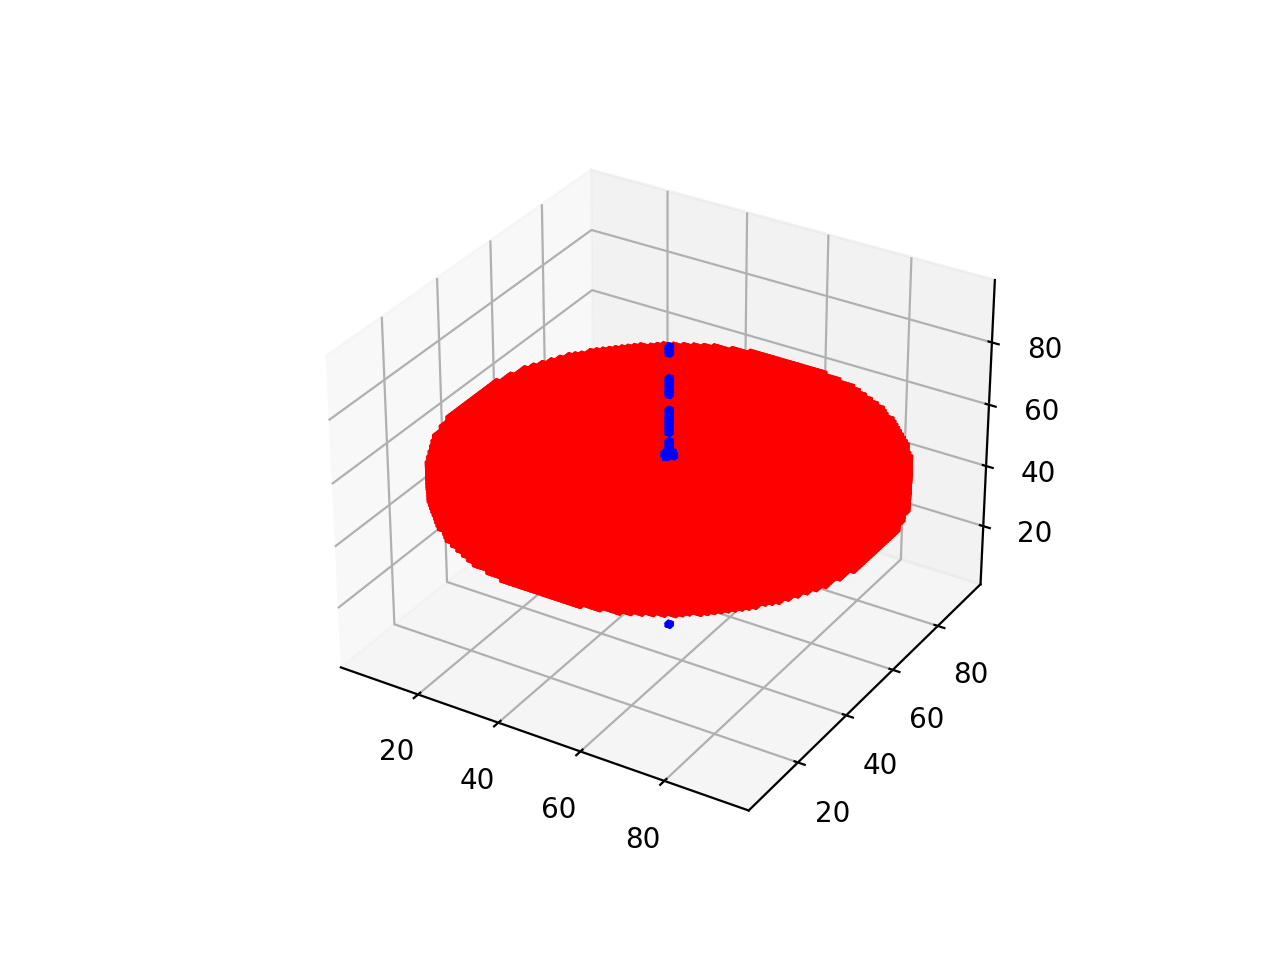

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.voxels(r_data, color='b')
ax.voxels(data, color='r')

ax.set_xlim(0,data.shape[0])
ax.set_ylim(0,data.shape[1])
ax.set_zlim(0,data.shape[2]);


## Conclusion

The shape of the Fourier Transform of the sample is called **relrod**.

This relrod replaces any point in recirpocal lattice.


We can conclude a few points from this notebook:
- The relrod is **perpendicular to the sample**
- The relrod is the major contribution to the excitation error. 


The surface of the sample may not be exactly perpendicular to the zone axis and has to be considered in our calulations
